In [20]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [21]:
boston=tf.keras.datasets.boston_housing

In [22]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [23]:
boston_data=boston.load_data()

In [24]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz",test_split=0.2,seed=42)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((404, 13), (404,), (102, 13), (102,))

In [26]:
scaler=StandardScaler()

In [27]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
y_train_scaled=scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled=scaler.fit_transform(y_test.reshape(-1,1))

In [28]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,),name="input_layer"),
    tf.keras.layers.Dense(100,name="hidden_layer_1"),
    tf.keras.layers.BatchNormalization(name="hidden_layer_2"),
    tf.keras.layers.Dense(50,name="hidden_layer_3"),
    tf.keras.layers.Dense(1,name="output_layer")
])

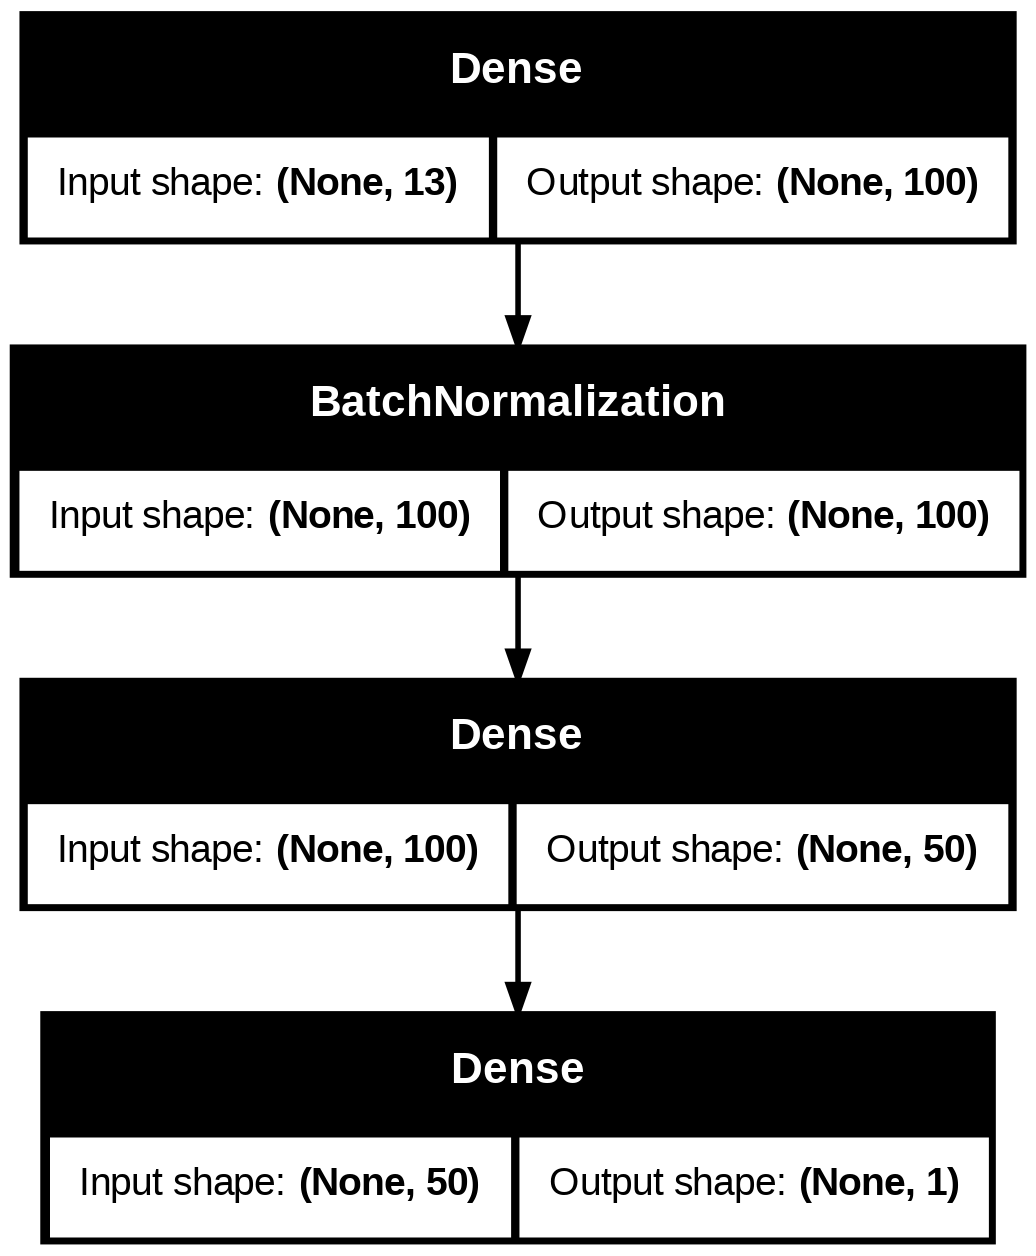

In [32]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [34]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)


In [35]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 554.1173 - mae: 22.1215 - val_loss: 1251.4271 - val_mae: 32.7738
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 542.9768 - mae: 21.8722 - val_loss: 791.4206 - val_mae: 26.7053
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 566.7208 - mae: 22.4665 - val_loss: 998.5523 - val_mae: 30.3515
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 532.1606 - mae: 21.7322 - val_loss: 866.8984 - val_mae: 28.4646
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 476.8900 - mae: 20.5558 - val_loss: 746.2811 - val_mae: 26.4356
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 377.7830 - mae: 18.4680 - val_loss: 450.5743 - val_mae: 20.3181
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 307.0794 - mae: 16.3382 - val_loss: 400.5767 - val_mae: 19.2581
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 169.7023 - mae: 11.8311 - val_loss: 167.8897 - val_mae: 11.6746
Epoch 9/20
13/13 

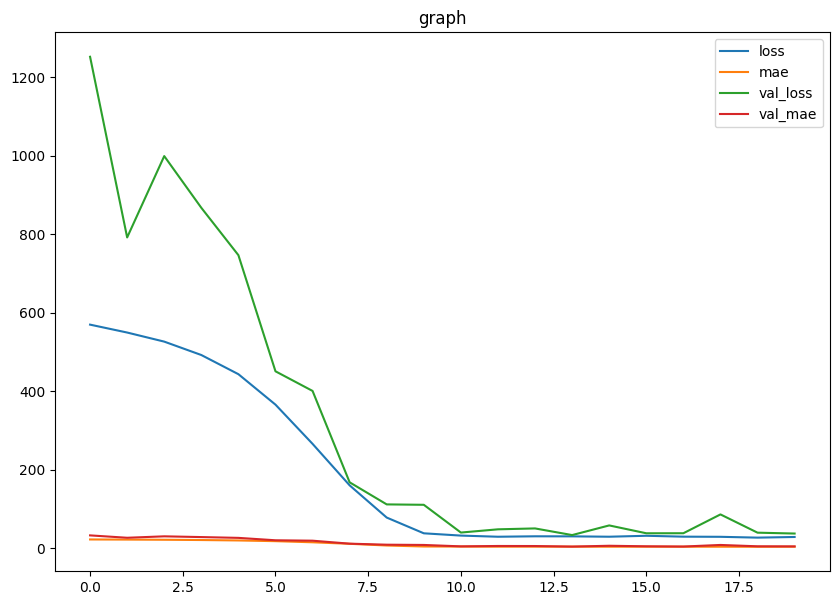

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("graph")
plt.show()

In [37]:
y_pred=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


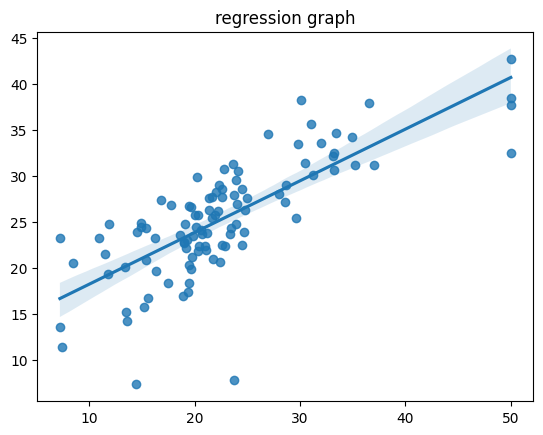

In [39]:
sns.regplot(x=y_test,y=y_pred)
plt.title("regression graph")
plt.show()

In [41]:
metrics.mean_absolute_error(y_test,y_pred)

4.738605757320628

In [42]:
metrics.mean_squared_error(y_test,y_pred)

37.45262992437064

In [43]:
metrics.r2_score(y_test,y_pred)

0.4739947788503538